In [254]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

In [255]:
saratoga_highlow=pd.read_csv('datasets/PRISM_tmin_tmax_monthly CSV.csv',delimiter=',')
saratoga_highlow_df = pd.DataFrame(saratoga_highlow)
saratoga_highlow_df.columns = saratoga_highlow_df.iloc[9]
saratoga_highlow_df = saratoga_highlow_df[10:]
#us_temperatures_df.to_csv('datasets/US-Temperatures-CSV2.csv', index=False) 
#saratoga_highlow_df=saratoga_highlow_df.set_index('Date')
saratoga_highlow_df=saratoga_highlow_df.reset_index(drop=True)
#saratoga_highlow_df
saratoga_highlow_df = saratoga_highlow_df.rename(columns={'tmin (degrees F)': 'tmin',
                                                          'tmax (degrees F)':'tmax'})
saratoga_highlow_df.head()
#us_temperatures_df.shape[1]

9,Date,tmin,tmax
0,1895-01,10,27.6
1,1895-02,6.8,26
2,1895-03,19.1,34.9
3,1895-04,36,55.7
4,1895-05,48,73.8


In [256]:
saratoga_highlow_df
date_split = saratoga_highlow_df["Date"].str.split("-", n = 1, expand = True) 
saratoga_highlow_df["Year"]= date_split[0] 
saratoga_highlow_df["Month"]= date_split[1] 
saratoga_highlow_df.drop(columns=["Date"], inplace = True) 
#https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
saratoga_highlow_df.head(20)

9,tmin,tmax,Year,Month
0,10,27.6,1895,01
1,6.8,26,1895,02
2,19.1,34.9,1895,03
3,36,55.7,1895,04
4,48,73.8,1895,05
5,58.1,81.6,1895,06
6,55.8,77.5,1895,07
7,55.9,77.6,1895,08
8,50.1,72.6,1895,09
9,32.8,53.1,1895,10


In [257]:
saratoga_highlow_df['Year'] = pd.to_numeric(saratoga_highlow_df['Year'])
saratoga_highlow_df['tmin'] = pd.to_numeric(saratoga_highlow_df['tmin'])
saratoga_highlow_df['tmax'] = pd.to_numeric(saratoga_highlow_df['tmax'])

In [274]:
#df_mean = saratoga_highlow_df.groupby((saratoga_highlow_df.Year//10)*10).mean()

df_max = saratoga_highlow_df.groupby((saratoga_highlow_df.Year//10)*10)
df_min =saratoga_highlow_df.groupby((saratoga_highlow_df.Year//10)*10)
#df_max.index.names = ['Year2']
#df_min.index.names = ['Year2']
#df_max=df.reset_index()
df_min=df.reset_index()


#df.drop(columns=['Date'])
#df["Date"]=df['Date'].astype(int)
#df_mean

#https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade

In [269]:
df_max

9,index,Year2,tmin,tmax,Year,Month
0,0,1890,62.9,83.9,1899,12
1,1,1900,62.2,84.0,1909,12
2,2,1910,61.8,85.0,1919,12
3,3,1920,63.2,83.4,1929,12
4,4,1930,61.9,85.2,1939,12
5,5,1940,61.2,86.9,1949,12
6,6,1950,61.4,87.7,1959,12
7,7,1960,59.5,84.7,1969,12
8,8,1970,58.8,82.9,1979,12
9,9,1980,61.1,84.9,1989,12


In [265]:
df_max

9,index,Year2,tmin,tmax,Year,Month
0,0,1890,62.9,83.9,1899,12
1,1,1900,62.2,84.0,1909,12
2,2,1910,61.8,85.0,1919,12
3,3,1920,63.2,83.4,1929,12
4,4,1930,61.9,85.2,1939,12
5,5,1940,61.2,86.9,1949,12
6,6,1950,61.4,87.7,1959,12
7,7,1960,59.5,84.7,1969,12
8,8,1970,58.8,82.9,1979,12
9,9,1980,61.1,84.9,1989,12


In [212]:
#x = range(13)
#negative_data = df.tmin
#positive_data = df.tmax

#fig = plt.figure()
#ax = plt.subplot(111)
#ax.bar(x, negative_data, width=1, color='r')
#ax.bar(x, positive_data, width=1, color='b')

In [213]:
#plot_data = numpy.random.normal(loc=4, size=(25, 3))

#canvas, table = toyplot.table(data, width=500, height=250)
#table.cells.cell[...].format = toyplot.format.FloatFormatter(format="{:.1f}")

#axes = table.body.row[1].cartesian()
#axes.bars(plot_data);

In [214]:
#df[["Date2", "tmin", "tmax"]].plot(x="Date2", kind="bar")

<IPython.core.display.Javascript object>


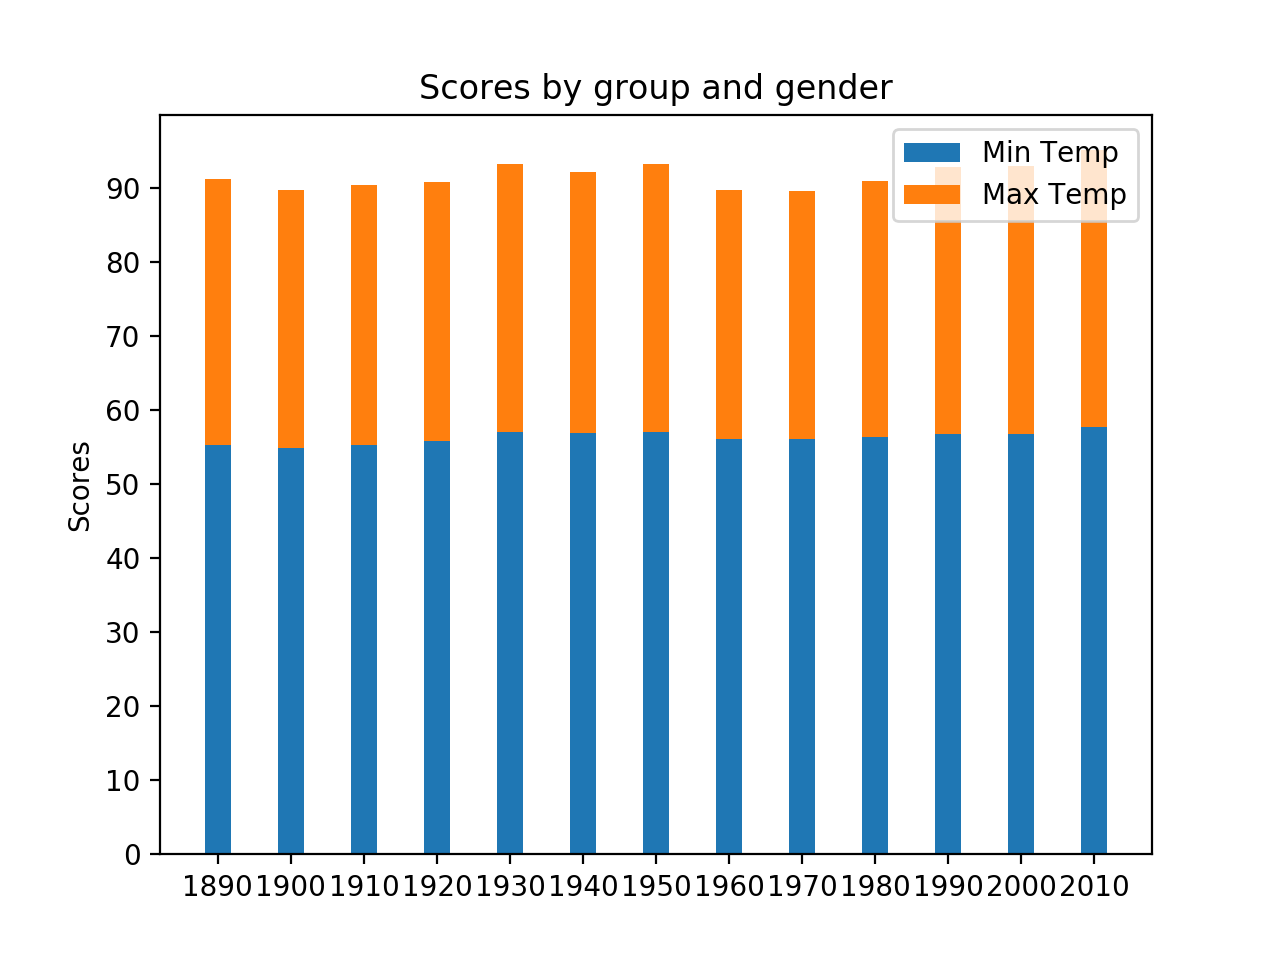

In [223]:
N = 13
x = df.Date2
y1 = df.tmax
y2= df.tmin
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, y1, width)
p2 = plt.bar(ind, y2, width,
             bottom=y1)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, df.Date2)
plt.yticks(np.arange(0, 100, 10))
plt.legend((p1[0], p2[0]), ('Min Temp', 'Max Temp'))

plt.show()